# Table of content

* 1. Import libraries

* 2. Set path

* 3. Import data

* 4. Data cleaning
    * 4.1 Missing values
    * 4.2 Duplicates
    * 4.3 Extreme values
    
* 5. Preparation for Regression

* 6. Regression Analysis

* 7. Thoughts on Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import os
import folium
from folium.plugins import FastMarkerCluster
import json
import scipy
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap 
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [9]:
path = '/Users/phongsathorn/Documents/Data Analytics/CareerFoundry/Achievement 6 - AirBnB Project'

In [11]:
df= pd.read_pickle(os.path.join(path, '02 Data','AirBnB Amsterdam','listings_airbnb_netherlands_CLEAN.pkl'))


In [12]:
df.shape

(19946, 36)

In [13]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'property_type',
       'accommodates', 'first_review', 'review_scores_value',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_rating', 'maximum_nights',
       'host_is_superhost', 'host_response_time', 'host_response_rate',
       'street', 'market', 'neighbourhood_cleansed', 'host_identity_verified',
       'instant_bookable', 'price_per_night', 'has_license', 'Price_class'],
      dtype='object')

In [14]:
# Resetting the index, to have 'id' column back

df.reset_index(inplace=True)

In [15]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'property_type',
       'accommodates', 'first_review', 'review_scores_value',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_rating', 'maximum_nights',
       'host_is_superhost', 'host_response_time', 'host_response_rate',
       'street', 'market', 'neighbourhood_cleansed', 'host_identity_verified',
       'instant_bookable', 'price_per_night', 'has_license', 'Price_class'],
      dtype='object')

In [16]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,property_type,accommodates,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,host_is_superhost,host_response_time,host_response_rate,street,market,neighbourhood_cleansed,host_identity_verified,instant_bookable,price_per_night,has_license,Price_class
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44,Apartment,2,2009-03-30,10.0,10.0,9.0,10.0,10.0,10.0,97.0,15,True,within an hour,100.0,"Amsterdam, North Holland, Netherlands",Amsterdam,Oostelijk Havengebied - Indische Buurt,f,t,19.666667,No License,Low price
1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47,Apartment,5,2015-07-31,9.0,9.0,9.0,10.0,10.0,10.0,96.0,20,False,within an hour,100.0,"Amsterdam, Noord-Holland, Netherlands",Amsterdam,Westerpark,t,f,40.000000,No License,Mid price
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198,Townhouse,2,2010-03-02,9.0,10.0,10.0,9.0,9.0,9.0,87.0,1000,False,within a few hours,100.0,"Amsterdam, North Holland, Netherlands",Amsterdam,Centrum-Oost,f,f,80.000000,No License,High price
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141,Apartment,3,2018-01-21,10.0,10.0,10.0,10.0,10.0,10.0,100.0,60,False,within a few hours,100.0,"Amsterdam, North Holland, Netherlands",Amsterdam,Centrum-West,f,f,8.928571,No License,Low price
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199,Houseboat,2,2012-01-09,10.0,10.0,10.0,10.0,10.0,10.0,99.0,730,True,within an hour,100.0,"Amsterdam, North Holland, Netherlands",Amsterdam,Centrum-West,t,t,75.000000,No License,High price


# Data Cleaning

### Missing values

In [17]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 2389
calculated_host_listings_count       0
availability_365                     0
property_type                        0
accommodates                         0
first_review                         0
review_scores_value               2640
review_scores_cleanliness         2628
review_scores_location            2641
review_scores_accuracy            2630
review_scores_communication       2633
review_scores_checkin             2642
review_scores_rating              2620
maximum_nights           

**NOTE**:
For our analysis it does not matter if we keep it for delete it because we do not need those variables. However, there are other values froom other coluns that are connected to it and we want to keep them. 
Therefore, we will keep all columns for now.

### Duplicates

In [18]:
df.duplicated().sum()

0

### Extreme values

<Axes: xlabel='price', ylabel='Count'>

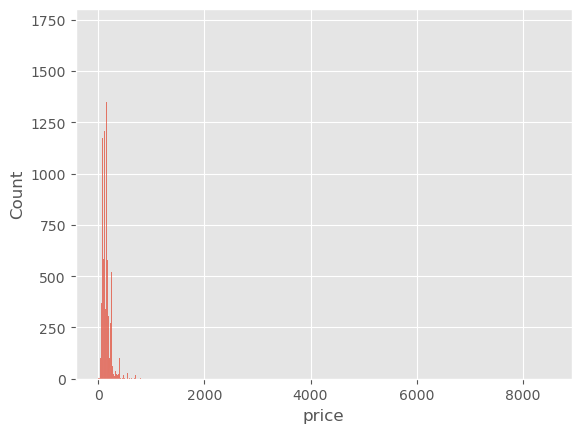

In [19]:
sns.histplot(data=df, x='price')

In [20]:
df['price'].describe()

count    19946.000000
mean       152.291688
std        146.040500
min          0.000000
25%         97.000000
50%        125.000000
75%        175.000000
max       8500.000000
Name: price, dtype: float64

<Axes: xlabel='accommodates', ylabel='Count'>

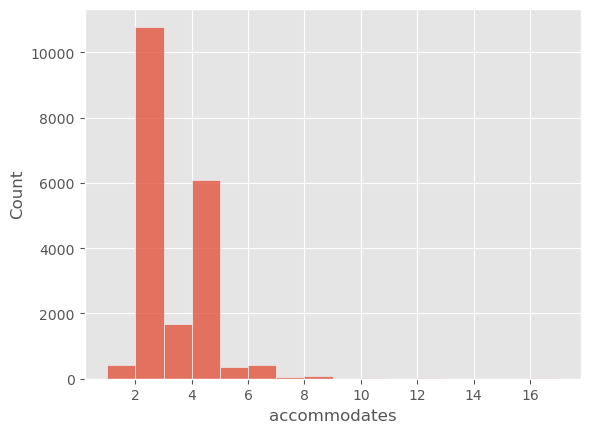

In [21]:
sns.histplot(data=df, x='accommodates',bins=16)

In [22]:
df['accommodates'].describe()

count    19946.000000
mean         2.891908
std          1.317430
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         17.000000
Name: accommodates, dtype: float64

<Axes: xlabel='review_scores_rating', ylabel='Count'>

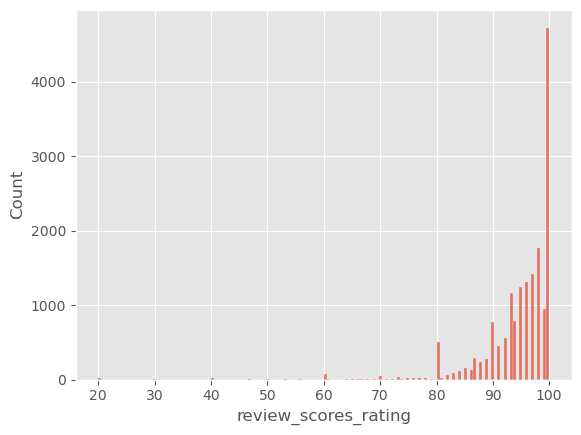

In [23]:
sns.histplot(data=df, x='review_scores_rating')

In [24]:
df['review_scores_rating'].describe()

count    17326.000000
mean        94.851495
std          6.646449
min         20.000000
25%         93.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [25]:
# create subset for correlation
sub=df[['price','accommodates','review_scores_rating','number_of_reviews','calculated_host_listings_count']]

In [26]:
# calculate correlation
sub.corr()

,price,accommodates,review_scores_rating,number_of_reviews,calculated_host_listings_count
price,1.000000,0.356234,0.029493,-0.067781,0.017304
accommodates,0.356234,1.000000,-0.041235,-0.060713,0.020286
review_scores_rating,0.029493,-0.041235,1.000000,0.005731,-0.134304
number_of_reviews,-0.067781,-0.060713,0.005731,1.000000,-0.042847
calculated_host_listings_count,0.017304,0.020286,-0.134304,-0.042847,1.000000


/Users/phongsathorn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


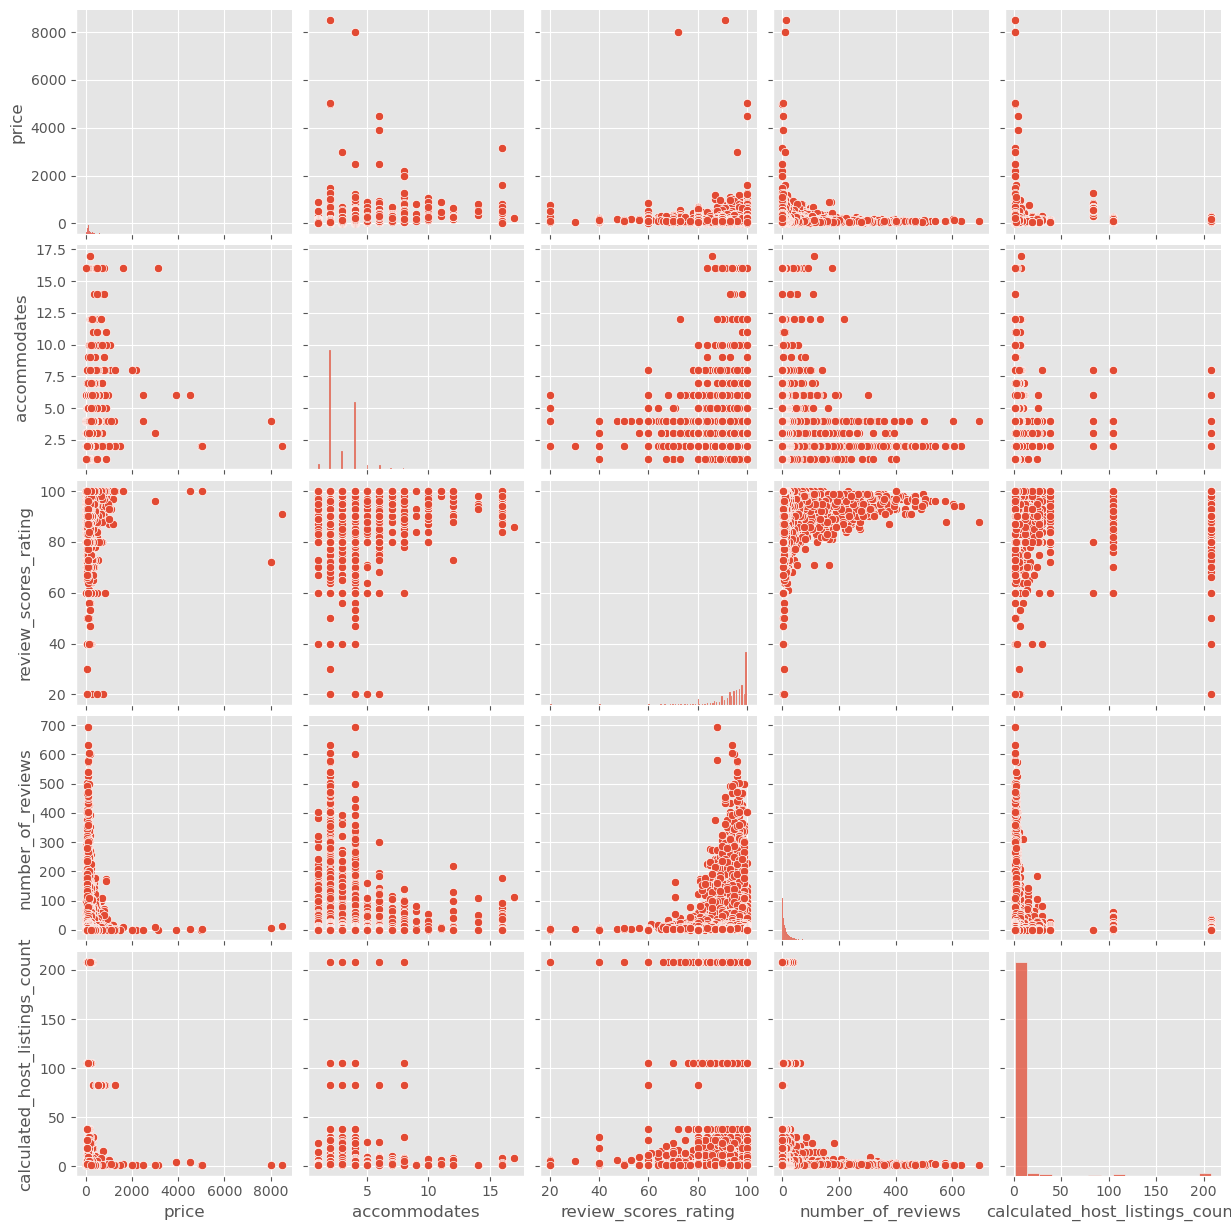

In [27]:
sns.pairplot(data=sub)

**NOTE** 
want to check regression for:

- The higher the number of accommodates, the higher is the price.
- The higher the number of ratings, the higher the rating scores will be.
- The higher the price, the lower the number_of_values

# 5. Preparation for Regression Model

In [28]:
# reshape values into numpy arrays

X = df['accommodates'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [29]:
X

array([[2],
       [5],
       [2],
       ...,
       [2],
       [2],
       [4]])

In [30]:
y

array([[ 59],
       [160],
       [ 80],
       ...,
       [ 80],
       [ 55],
       [220]])

In [31]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 6 Regression Analysis

### 6.1 Fit on Training set

In [32]:
# Create a regression object.

regression = LinearRegression() 

In [33]:
# Fit the regression object onto the train set.

regression.fit(X_train, y_train)  ##regression contains our model based
                                    # on the Training data set-correlation


# Note: You just created a model

LinearRegression()

In [34]:
# predict the values for y in the own Training set

y_predicted_train=regression.predict(X_train)  ##using x values from the training set

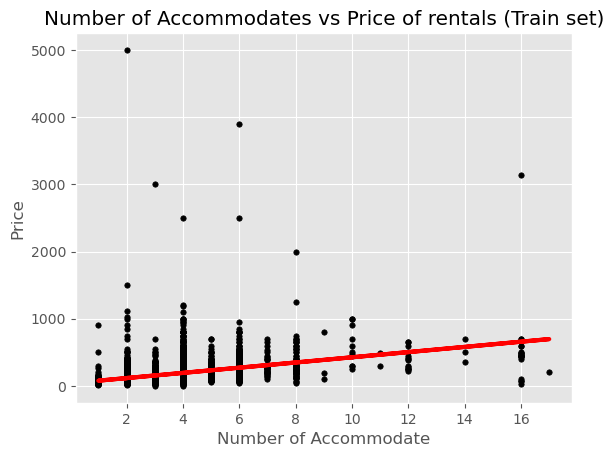

In [35]:
# Create a plot that shows the regression line from the model on the Train set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='black', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Accommodates vs Price of rentals (Train set)')
plot_test.xlabel('Number of Accommodate')
plot_test.ylabel('Price')
plot_test.show()

In [36]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_train, y_predicted_train) 
r2 = r2_score(y_train, y_predicted_train) 

#print the results
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[38.67786138]]
Mean squared error:  11169.5288863727
R2 score:  0.18885238147245664


**NOTE**

- Big mean squared error.The regression line is too far away from the majority of the points
- Low r2 score.

Not a good model.

### 6.2 Fit the Test set with the model of the training set

In [37]:
# predict the y value for the Test set using the model that has been created by TRAINING set

y_predicted_test=regression.predict(X_test)

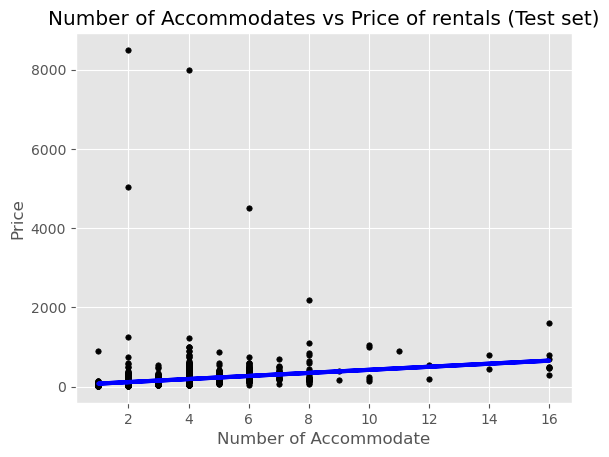

In [38]:
# Create a plot that shows the regression line from the model on the TEST set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted_test, color='blue', linewidth =3)
plot_test.title('Number of Accommodates vs Price of rentals (Test set)')
plot_test.xlabel('Number of Accommodate')
plot_test.ylabel('Price')
plot_test.show()

In [39]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted_test) 
r2 = r2_score(y_test, y_predicted_test) 

#print the results
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[38.67786138]]
Mean squared error:  36013.65510082981
R2 score:  0.07526350708879204


**NOTE**

Few points align on the line but many points show extreme distances to the line .

- Mean sqared error (36013) is even higher than in the Training set
- r2 score is even lower than in the Training set.

The Model is overfitted and not suitable for making predictions

### Predicting y values in Training data

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(10)

,Actual,Predicted
0,150,116.556815
1,500,193.912538
2,100,116.556815
3,100,116.556815
4,150,116.556815
5,100,193.912538
6,125,193.912538
7,160,155.234676
8,178,116.556815
9,79,116.556815


**Note**

The predicted values show strong differences from the actual y values

### Predicting y values in Test data

In [41]:
# Create a dataframe comparing the actual and predicted values of y.

data2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted_test.flatten()})
data2.head(10)

,Actual,Predicted
0,200,116.556815
1,119,116.556815
2,195,271.268260
3,250,193.912538
4,125,116.556815
5,150,155.234676
6,200,193.912538
7,195,155.234676
8,149,116.556815
9,125,155.234676


**NOTE**

Strong differences between both values.

# 7 . Thoughs on the model


The model, trained on the provided dataset, demonstrates low performance in predicting outcomes for TEST data set, primarily due to notable differences in Mean Relative Error (MRE) and R-squared values.

To improve the model's predictive accuracy, it's recommended to retrain it using an alternative dataset, ideally one with a more balanced distribution of data points.

Upon examining the plot, it's clear to see that the majority of accommodations cluster around a value of 4, with occasional outliers ranging from 8 to 16. Similarly, most prices tend to hover around 1000, although there are variations for accommodations of 8 or 16. Notably, there are instances where prices range from 5000 to over 8000 for accommodations of 2, while prices below 1000 are observed for accommodations of 16.

These findings suggest the existence of additional factors influencing prices beyond just accommodation capacity, including location, duration of stay, and whether the property is listed by a super host. Pricing biases are inherent, as hosts set prices based on their subjective evaluations of value, resulting in a lack of standardized pricing criteria. Furthermore, the type of property also plays a significant role in determining price points.

In [ ]:
# reshape values into numpy arrays

X = df['accommodates'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)